In [ ]:
!pip install wfdb
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3
!pip install neurokit2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import glob
from IPython.display import display
import wfdb
from wfdb import processing
import neurokit2 as nk

In [ ]:
!wget -r -N -c -np https://physionet.org/files/nsrdb/1.0.0/

In [ ]:
dat_paths = natsorted(glob.glob("/content/physionet.org/files/nsrdb/1.0.0*.dat"))

In [ ]:
dat_paths

[]

showing a example for beat extraction upto sample 1500 only

In [ ]:
record = wfdb.rdrecord('/content/physionet.org/files/nsrdb/1.0.0/16265',sampfrom=0,sampto=1500)
ann = wfdb.rdann('/content/physionet.org/files/nsrdb/1.0.0/16265', 'atr',sampfrom=0,sampto=1500)
#wfdb.plot_wfdb(record, ann)
display(record.__dict__)

{'adc_gain': [200.0, 200.0],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(8, 4),
 'baseline': [0, 0],
 'block_size': [0, 0],
 'byte_offset': [None, None],
 'checksum': [50436, 45338],
 'comments': ['32 M'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['16265.dat', '16265.dat'],
 'fmt': ['212', '212'],
 'fs': 128,
 'init_value': [-33, -65],
 'n_sig': 2,
 'p_signal': array([[-0.165, -0.325],
        [-0.155, -0.325],
        [-0.195, -0.305],
        ...,
        [-0.355, -0.065],
        [-0.315, -0.035],
        [-0.265, -0.055]]),
 'record_name': '16265',
 'samps_per_frame': [1, 1],
 'sig_len': 1500,
 'sig_name': ['ECG1', 'ECG2'],
 'skew': [None, None],
 'units': ['mV', 'mV']}

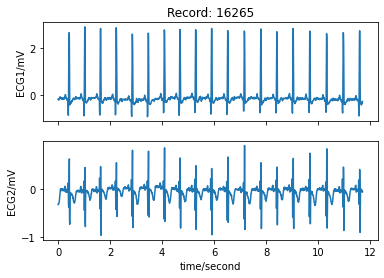

In [ ]:
wfdb.plot_wfdb(record)

New frequency sample: 250
New signal length: 2929
[[-0.165      -0.325     ]
 [-0.13392334 -0.35529382]
 [-0.15677324 -0.32331529]
 ...
 [-0.2860884   0.00097872]
 [-0.26615586 -0.0496419 ]
 [-0.22657432 -0.19582671]]


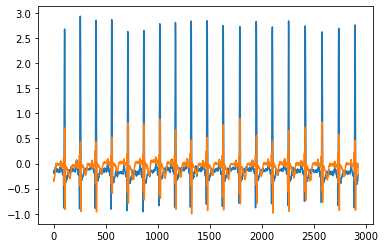

In [ ]:
fs = 250
new_sig, new_ann = wfdb.processing.resample_multichan(record.p_signal,
                                                      ann, record.fs,
                                                      fs_target = fs)
record.fs = fs # Update record's fs
print("New frequency sample: " + str(record.fs))
plt.plot(new_sig)
print("New signal length: " + str(len(new_sig))) 

print(new_sig)

The average is -0.05882999999999999and the std is 0.41314626258613174


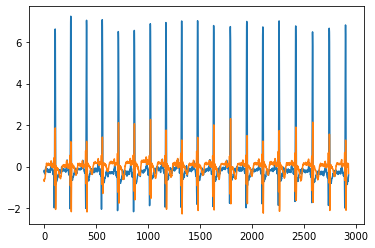

In [ ]:
# Z-normalise
avg = new_sig.mean() # Count Mean once
sd = new_sig.std() # Count SD once
print("The average is " + str(avg) + "and the std is " + str(sd))
new_sig = (new_sig - avg)/(sd)
plt.plot(new_sig);

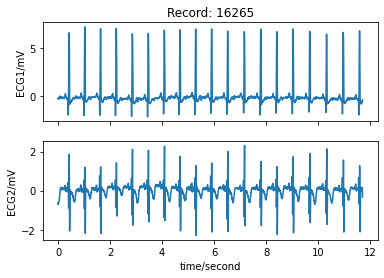

{'adc_gain': [200.0, 200.0],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(8, 4),
 'baseline': [0, 0],
 'block_size': [0, 0],
 'byte_offset': [None, None],
 'checksum': [50436, 45338],
 'comments': ['32 M'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['16265.dat', '16265.dat'],
 'fmt': ['212', '212'],
 'fs': 250,
 'init_value': [-33, -65],
 'n_sig': 2,
 'p_signal': array([[-0.25697921, -0.64425126],
        [-0.1817597 , -0.71757596],
        [-0.23706676, -0.64017351],
        ...,
        [-0.55006765,  0.14476404],
        [-0.50182193,  0.02223934],
        [-0.40601679, -0.33159373]]),
 'record_name': '16265',
 'samps_per_frame': [1, 1],
 'sig_len': 2929,
 'sig_name': ['ECG1', 'ECG2'],
 'skew': [None, None],
 'units': ['mV', 'mV']}

In [ ]:
# Update with pre-processed signal
record.p_signal = new_sig
record.sig_len = len(new_sig)
wfdb.plot_wfdb(record)
display(record.__dict__)

In [ ]:
new_sig=new_sig[:,[0]]
data_final=new_sig.flatten()
print(data_final)

[-0.25697921 -0.1817597  -0.23706676 ... -0.55006765 -0.50182193
 -0.40601679]


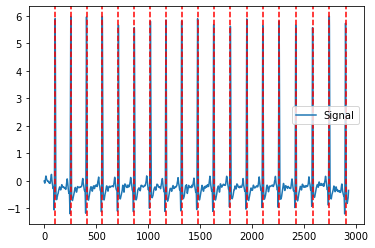

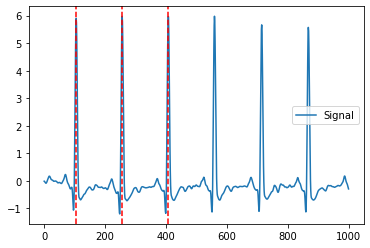

In [ ]:
# Extract R-peaks locations
signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks_final,cleaned_ecg_final)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks_final[:3], cleaned_ecg_final[:1000])

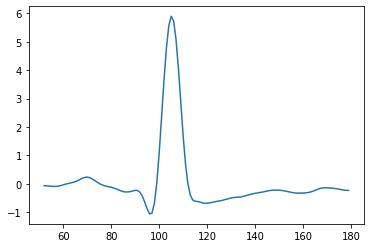

In [ ]:
result=[]
m=rpeaks_final[0]
n=rpeaks_final[1]
mid_point=(m+n)//2
plt.plot(cleaned_ecg_final[(0+m)//2:mid_point])
#print(cleaned_ecg1[(0+i)//2:mid_point].values)
result.append(cleaned_ecg_final[(0+m)//2:mid_point].values)

In [ ]:
np.array(result).shape

(1, 128)

In [ ]:
len(rpeaks_final)
print(rpeaks_final)

[ 105  256  408  559  714  867 1022 1172 1323 1476 1631 1791 1949 2103
 2260 2420 2582 2743 2899]


Dataset for patient id 16265 as a general method in which rpeaks of different beats is not at the middle

In [ ]:
record1 = wfdb.rdrecord('/content/physionet.org/files/nsrdb/1.0.0/16265',sampfrom=0,sampto=10000)
ann = wfdb.rdann('/content/physionet.org/files/nsrdb/1.0.0/16265', 'atr',sampfrom=0,sampto=10000)

#upsampling the sampling frequency from 128 hz to 250 Hz
fs = 250
new_sig, new_ann = wfdb.processing.resample_multichan(record1.p_signal, ann, record1.fs, fs_target = fs)

new_sig=new_sig[:,[0]]
data_final=new_sig.flatten()

signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
result0=[]
for k in range(length-1):
  if(k==0):
    m=rpeaks_final[0]
    n=rpeaks_final[1]
    mid_point=(m+n)//2
    #plt.plot(cleaned_ecg_final[(0+i)//2:mid_point])
    #print(cleaned_ecg1[(0+i)//2:mid_point].values)
    result0.append(cleaned_ecg_final[(0+m)//2:mid_point].values)
  else:
    m=rpeaks_final[k-1]
    n=rpeaks_final[k]
    p=rpeaks_final[k+1]
    mid_point=(m+n)//2
    mid_point1=(n+p)//2
    #plt.plot(cleaned_ecg_final[mid_point:mid_point1])
    #print(cleaned_ecg_final[mid_point:mid_point1].values)
    result0.append(cleaned_ecg_final[mid_point:mid_point1].values)

In [ ]:
type(cleaned_ecg_final)
cleaned_ecg_final.values
np.array(result0).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


(648,)

Dataset of Patient using rpeaks at the middle of the array , in this method the length of different beat will be same with  rpeaks at the midddle of the array. for example if the length is 200 units then rpeaks will be at position:100 for each beats . Hereafter only this method for further extraction.

Daatset for Patient 16265

In [ ]:
record_16265= wfdb.rdrecord('/content/physionet.org/files/nsrdb/1.0.0/16265',sampfrom=0,sampto=80000)
ann = wfdb.rdann('/content/physionet.org/files/nsrdb/1.0.0/16265', 'atr',sampfrom=0,sampto=80000)

#upsampling the sampling frequency from 128 hz to 250 Hz
fs = 250
new_sig, new_ann = wfdb.processing.resample_multichan(record_16265.p_signal, ann, record_16265.fs, fs_target = fs)

new_sig=new_sig[:,[0]]
data_final=new_sig.flatten()

signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_16265(k):
  patient_16265=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_16265[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_16265[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_16265[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_16265

In [ ]:
patient_16265_ecg=[]
for k in range(1,length-1):
  patient_16265_ecg.append(get_ecg_16265(k))

In [ ]:
type(patient_16265_ecg)
np.array(patient_16265_ecg).shape

(1080, 200)

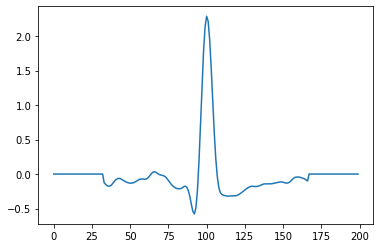

In [ ]:
plt.plot(patient_16265_ecg[637])

In [ ]:
data_16265=pd.DataFrame(patient_16265_ecg)
data_16265.to_csv('data_16265.csv')

Dataset for patient id 16483

In [ ]:
record_16483 = wfdb.rdrecord('/content/physionet.org/files/nsrdb/1.0.0/16483',sampfrom=0,sampto=80000)
ann = wfdb.rdann('/content/physionet.org/files/nsrdb/1.0.0/16483', 'atr',sampfrom=0,sampto=80000)

#upsampling the sampling frequency from 128 hz to 250 Hz
fs = 250
new_sig, new_ann = wfdb.processing.resample_multichan(record_16483.p_signal, ann, record_16483.fs, fs_target = fs)
record_16483.fs = fs # Update record_16483's fs

new_sig=new_sig[:,[0]]
data_final=new_sig.flatten()

signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_16483(k):
  patient_16483=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_16483[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_16483[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_16483[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_16483

In [ ]:
patient_16483_ecg=[]
for k in range(1,length-1):
  patient_16483_ecg.append(get_ecg_16483(k))

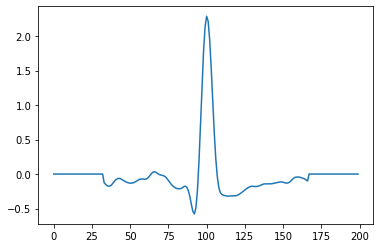

In [ ]:
plt.plot(patient_16265_ecg[637])

In [ ]:
data_16483=pd.DataFrame(patient_16483_ecg)
data_16483.to_csv('data_16483.csv')
data_16483.shape

(931, 200)

Dataset for patient id 18184

In [ ]:
record_18184 = wfdb.rdrecord('/content/physionet.org/files/nsrdb/1.0.0/18184',sampfrom=0,sampto=80000)
ann = wfdb.rdann('/content/physionet.org/files/nsrdb/1.0.0/18184', 'atr',sampfrom=0,sampto=80000)

#upsampling the sampling frequency from 128 hz to 250 Hz
fs = 250
new_sig, new_ann = wfdb.processing.resample_multichan(record_18184.p_signal, ann, record_18184.fs, fs_target = fs)
record_18184.fs = fs # Update record_18184's fs

new_sig=new_sig[:,[0]]
data_final=new_sig.flatten()

signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_18184(k):
  patient_18184=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_18184[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_18184[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_18184[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_18184

In [ ]:
patient_18184_ecg=[]
for k in range(1,length-1):
  patient_18184_ecg.append(get_ecg_18184(k))

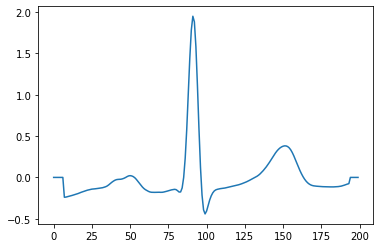

In [ ]:
plt.plot(patient_18184_ecg[637])

In [ ]:
data_18184=pd.DataFrame(patient_18184_ecg)
data_18184.to_csv('data_18184.csv')
data_18184.shape

(910, 200)

dataset of patient 16420

In [ ]:
record_16420 = wfdb.rdrecord('/content/physionet.org/files/nsrdb/1.0.0/16420',sampfrom=0,sampto=80000)
ann = wfdb.rdann('/content/physionet.org/files/nsrdb/1.0.0/16420', 'atr',sampfrom=0,sampto=80000)

#upsampling the sampling frequency from 128 hz to 250 Hz
fs = 250
new_sig, new_ann = wfdb.processing.resample_multichan(record_16420.p_signal, ann, record_16420.fs, fs_target = fs)
record_16420.fs = fs # Update record_16420's fs

new_sig=new_sig[:,[0]]
data_final=new_sig.flatten()

signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_16420(k):
  patient_16420=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_16420[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_16420[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_16420[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_16420

In [ ]:
patient_16420_ecg=[]
for k in range(1,length-1):
  patient_16420_ecg.append(get_ecg_16420(k))

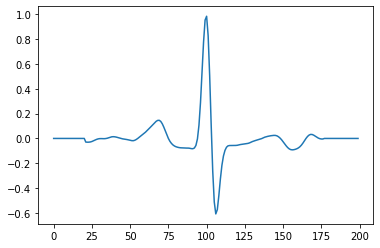

In [ ]:
plt.plot(patient_16420_ecg[100])

In [ ]:
data_16420=pd.DataFrame(patient_16420_ecg)
data_16420.to_csv('data_16420.csv')
data_16420.shape

(935, 200)

dataset of patient 16539

In [ ]:
record_16539 = wfdb.rdrecord('/content/physionet.org/files/nsrdb/1.0.0/16539',sampfrom=0,sampto=80000)
ann = wfdb.rdann('/content/physionet.org/files/nsrdb/1.0.0/16539', 'atr',sampfrom=0,sampto=80000)

#upsampling the sampling frequency from 128 hz to 250 Hz
fs = 250
new_sig, new_ann = wfdb.processing.resample_multichan(record_16539.p_signal, ann, record_16539.fs, fs_target = fs)

new_sig=new_sig[:,[0]]
data_final=new_sig.flatten()

signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_16539(k):
  patient_16539=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_16539[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_16539[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_16539[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_16539

In [ ]:
patient_16539_ecg=[]
for k in range(1,length-1):
  patient_16539_ecg.append(get_ecg_16539(k))

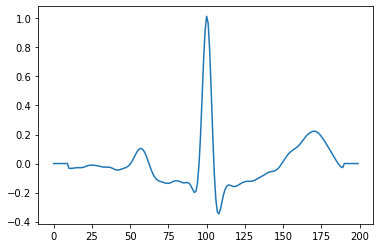

In [ ]:
plt.plot(patient_16539_ecg[100])

In [ ]:
data_16539=pd.DataFrame(patient_16539_ecg)
data_16539.to_csv('data_16539.csv')
data_16539.shape

(892, 200)

dataset for patient 19140

In [ ]:
record_19140 = wfdb.rdrecord('/content/physionet.org/files/nsrdb/1.0.0/19140',sampfrom=0,sampto=80000)
ann = wfdb.rdann('/content/physionet.org/files/nsrdb/1.0.0/19140', 'atr',sampfrom=0,sampto=80000)

#upsampling the sampling frequency from 128 hz to 250 Hz
fs = 250
new_sig, new_ann = wfdb.processing.resample_multichan(record_19140.p_signal, ann, record_19140.fs, fs_target = fs)
record_19140.fs = fs # Update record1's fs

new_sig=new_sig[:,[0]]
data_final=new_sig.flatten()

signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_19140(k):
  patient_19140=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_19140[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_19140[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_19140[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_19140

In [ ]:
patient_19140_ecg=[]
for k in range(1,length-1):
  patient_19140_ecg.append(get_ecg_19140(k))

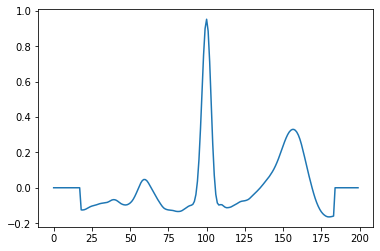

In [ ]:
plt.plot(patient_19140_ecg[63])

In [ ]:
data_19140=pd.DataFrame(patient_19140_ecg)
data_19140.to_csv('data_19140.csv')
data_19140.shape

(986, 200)

dataset of patient 19093

In [ ]:
record_19093 = wfdb.rdrecord('/content/physionet.org/files/nsrdb/1.0.0/19093',sampfrom=0,sampto=80000)
ann = wfdb.rdann('/content/physionet.org/files/nsrdb/1.0.0/19093', 'atr',sampfrom=0,sampto=80000)

#upsampling the sampling frequency from 128 hz to 250 Hz
fs = 250
new_sig, new_ann = wfdb.processing.resample_multichan(record_19093.p_signal, ann, record_19093.fs, fs_target = fs)
record_19093.fs = fs # Update record1's fs

record_19093.p_signal = new_sig

new_sig=new_sig[:,[0]]
data_final=new_sig.flatten()

signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_19093(k):
  patient_19093=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_19093[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_19093[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_19093[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_19093

In [ ]:
patient_19093_ecg=[]
for k in range(1,length-1):
  patient_19093_ecg.append(get_ecg_19093(k))

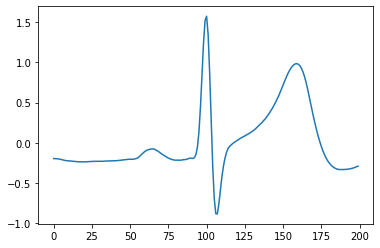

In [ ]:
plt.plot(patient_19093_ecg[37])

In [ ]:
data_19093=pd.DataFrame(patient_19093_ecg)
data_19093.to_csv('data_19093.csv')
data_19093.shape

(694, 200)

dataset of patient 19830

In [ ]:
record_19830= wfdb.rdrecord('/content/physionet.org/files/nsrdb/1.0.0/19830',sampfrom=0,sampto=80000)
ann = wfdb.rdann('/content/physionet.org/files/nsrdb/1.0.0/19830', 'atr',sampfrom=0,sampto=80000)

#upsampling the sampling frequency from 128 hz to 250 Hz
fs = 250
new_sig, new_ann = wfdb.processing.resample_multichan(record_19830.p_signal, ann, record_19830.fs, fs_target = fs)
record_19830.fs = fs # Update record1's fs

record_19830.p_signal = new_sig

new_sig=new_sig[:,[0]]
data_final=new_sig.flatten()

signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_19830(k):
  patient_19830=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_19830[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_19830[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_19830[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_19830

In [ ]:
patient_19830_ecg=[]
for k in range(1,length-1):
  patient_19830_ecg.append(get_ecg_19830(k))

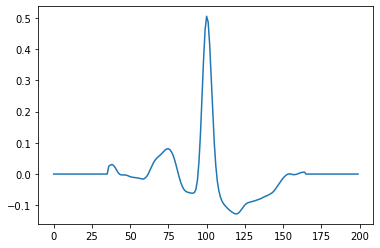

In [ ]:
plt.plot(patient_19830_ecg[76])

In [ ]:
data_19830=pd.DataFrame(patient_19830_ecg)
data_19830.to_csv('data_19830.csv')
data_19830.shape

(1099, 200)

Dataset of patient 19088

In [ ]:
record_19088= wfdb.rdrecord('/content/physionet.org/files/nsrdb/1.0.0/19088',sampfrom=0,sampto=80000)
ann = wfdb.rdann('/content/physionet.org/files/nsrdb/1.0.0/19088', 'atr',sampfrom=0,sampto=80000)

#upsampling the sampling frequency from 128 hz to 250 Hz
fs = 250
new_sig, new_ann = wfdb.processing.resample_multichan(record_19088.p_signal, ann, record_19088.fs, fs_target = fs)
record_19088.fs = fs # Update record1's fs

record_19088.p_signal = new_sig

new_sig=new_sig[:,[0]]
data_final=new_sig.flatten()

signals, info = nk.ecg_process(data_final, sampling_rate=250)
_, rpeaks = nk.ecg_peaks(data_final, sampling_rate=250)
rpeaks_final = info["ECG_R_Peaks"]
cleaned_ecg_final= signals["ECG_Clean"]

In [ ]:
length=len(rpeaks_final)
def get_ecg_19088(k):
  patient_19088=[0]*200
  m=rpeaks_final[k-1]
  n=rpeaks_final[k]
  p=rpeaks_final[k+1]
  mid_point=(m+n)//2
  mid_point1=(n+p)//2

  #at the mid_point ,rpeaks storage
  patient_19088[100]=(cleaned_ecg_final[n])

  #before the n:rpeaks @ n to the midpoint
  i=n-1;
  j = 99;
  while i>=mid_point and j>=0:
    patient_19088[j]=cleaned_ecg_final[i]
    i = i-1
    j = j-1

  #after n to midpoint but length of 100 samples
  i = n+1;
  j = 101
  while i<=mid_point1 and j<200:
    patient_19088[j]=cleaned_ecg_final[i]
    i = i+1
    j = j+1
  return patient_19088

In [ ]:
patient_19088_ecg=[]
for k in range(1,length-1):
  patient_19088_ecg.append(get_ecg_19088(k))

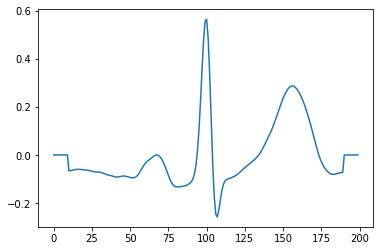

In [ ]:
plt.plot(patient_19088_ecg[637])

In [ ]:
data_19088=pd.DataFrame(patient_19088_ecg)
data_19088.to_csv('data_19088.csv')
data_19088.shape

(927, 200)

Combining all dataset into single Dataframe

In [ ]:
files=natsorted(glob.glob('data_*'))

In [ ]:
files

['data_16265.csv',
 'data_16420.csv',
 'data_16483.csv',
 'data_16539.csv',
 'data_18184.csv',
 'data_19088.csv',
 'data_19093.csv',
 'data_19140.csv',
 'data_19830.csv']

In [ ]:
data_final_Normal=pd.concat((pd.read_csv(file) for file in files), ignore_index=True)
data_final_Normal.shape

(8454, 201)

In [ ]:
data_final_Normal.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '190', '191', '192', '193', '194', '195', '196', '197', '198', '199'],
      dtype='object', length=201)

Converting the final Dataframe to save into csv file as Data_final_normal

In [ ]:
data_final_Normal=pd.DataFrame(data_final_Normal)
#data_final_Normal.to_csv('data_MITBH_Normal.csv')
data_final_Normal.shape

(8454, 201)

In [ ]:
data_final_Normal.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_final_Normal.drop('Unnamed: 0',inplace = True, axis = 1)
data_final_Normal.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '190', '191', '192', '193', '194', '195', '196', '197', '198', '199'],
      dtype='object', length=200)

In [ ]:
data_final_Normal=pd.DataFrame(data_final_Normal)
data_final_Normal.columns=['c' + str(i) for i in range(200)]
#data_final_Normal.index=["beat" + str(i) for i in range(6940)]
data_final_Normal.to_csv('data_MITBH_Normal.csv')
data_final_Normal.shape

(8454, 200)

In [ ]:
print(data_final_Normal)

       c0   c1   c2   c3   c4   c5   c6   c7   c8   c9  ...  c190  c191  c192  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
8449  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
8450  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
8451  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
8452  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
8453  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

      c193  c194  c195  c19

In [ ]:
data_=data_final_Normal.iloc[6337,:]

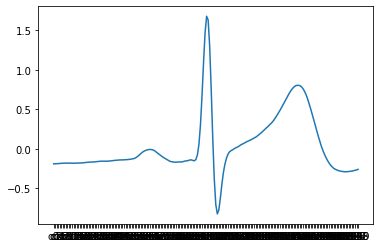

In [ ]:
plt.plot(data_)